# Handwritten Digit Reconition System

 `MNIST dataset`

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

`Importing Pandas Library`

In [2]:
import pandas as pd
import numpy as np

`Loading MNIST Dataset (Train and Test) from Keras which is an open-source deep-learning framework`

`TensorFlow is a popular open-source machine learning library developed by Google that offers a wide range of functionalities to work with large datasets.`

`Keras is an open-source library that provides a Python interface for artificial neural networks. Keras was first independent software, then integrated into TensorFlow library, and later supporting more.`

`Keras is the high-level API of the TensorFlow platform. It provides an approachable, highly-productive interface for solving machine learning (ML) problems, with a focus on modern deep learning.`

In [3]:
from tensorflow import keras

(train_images,train_labels),(test_images,test_labels)=keras.datasets.mnist.load_data()

train_images=np.array(train_images).reshape(60000,784)
train_labels=np.array(train_labels).reshape(60000,1)
train=np.concatenate((train_labels,train_images),axis=1)
train=pd.DataFrame(train)

# ------------------------------------------------------------

test_images=np.array(test_images).reshape(10000,784)
test_labels=np.array(test_labels).reshape(10000,1)
test=np.concatenate((test_labels,test_images),axis=1)
test=pd.DataFrame(test)

### `Train Data Set`

60000 rows × 785 columns

60000 images, each of 28X28 size

first column is the corresponding image label

In [4]:
train.shape


(60000, 785)

In [5]:
train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### `Test Data Set`

10000 rows × 785 columns

10000 images, each of 28X28 size

first column is the corresponding image label

In [6]:
test.shape

(10000, 785)

In [7]:
test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### `Plotting the images of the train dataset`

Enter any index of range [0,60000): 8435

IMAGE IS:


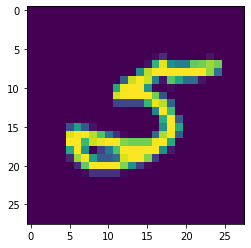

LABEL IS:  5


In [8]:
import matplotlib.pyplot as plt
import numpy as np

train_index = int(input('Enter any index of range [0,60000): '))

a=train.iloc[train_index,1:]
number=np.array(a).reshape(28,28)

print('\nIMAGE IS:')

plt.imshow(number)
plt.show()

print('LABEL IS: ',train.iloc[train_index,0])

# Feature Engineering

### `converting the train and test DataFrames to Numpy Arrays`

In [9]:
x=np.array(train)
y=np.array(test)

X_train = x[:,1:]
Y_train = x[:,0]
X_test = y[:,1:]
Y_test = y[:,0] 
# X denotes the images and Y denotes labels

### `Generating images with new features`

In [10]:
from keras.preprocessing.image import ImageDataGenerator

X_train = X_train.reshape(-1,28,28,1)


In [11]:
datagenerator = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    shear_range = 0.1
)

datagenerator.fit(X_train)

In [12]:
X_train = X_train.reshape(-1,784)

# Evaluating the Model

`The kNN algorithm can be considered a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ (where k is an integer) neighbors in the feature space.`

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

### `Testing the Algorithm`

Enter any test image index of range [0,10000): 5375

Actual image in the Test data at index 5375 before testing the model is as below:


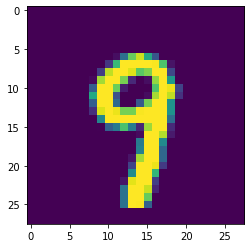

Label of actual digit in the Test data at index 5375 is: 9


In [15]:
test_index = int(input('Enter any test image index of range [0,10000): '))
num = np.array(test.iloc[test_index,1:]).reshape(28,28)

plt.imshow(num)
print("\nActual image in the Test data at index {0} before testing the model is as below:".format(test_index))
plt.show()

test_digit_label=test.iloc[test_index,0]

print("Label of actual digit in the Test data at index {0} is: {1}".format(test_index,test_digit_label))

### `Test Data is passed as a parameter to the predict function`

In [16]:
predicted_digit_by_algorithm=int(knn.predict(np.array(test.iloc[test_index,1:]).reshape(1,-1)))
print('Digit predicted by the Algorithm is:',predicted_digit_by_algorithm)

Digit predicted by the Algorithm is: 9


In [17]:
if(test_digit_label == predicted_digit_by_algorithm):
    print('PREDICTION IS ACCURATE')
else:
    print('PREDICTION IS INACCURATE')

PREDICTION IS ACCURATE


####  If the label of Actual digit (i.e Digit entered by the user) and the label of the  Predicted digit are same it says that the Prediction is accurate, otherwise it is inaccurate. 